In [1]:
# Titanic Problem using PyTorch

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
# Torch Version
print(f"Torch Version: {torch.__version__}")

# Device Agonistic Code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Torch Version: 2.0.0+cpu
Device: cpu


In [3]:
# Reading train data

trainData = pd.read_csv("/kaggle/input/titanic/train.csv")
trainData

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [4]:
testData = pd.read_csv("/kaggle/input/titanic/test.csv")
testData

PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0              330911    7.8292   NaN        Q  
1    female  47.0      1      0              363272    7.0000   NaN        S  
2      male  62.0      0      0              240276    9.6875   NaN        Q  
3      male  27.0      0      0              315154    8.6625   NaN        S  
4    female  22.0      1      1             3101298   12.2875   NaN        S  
..      ...   ...    ...    ...                 ...       ...   ...      ...  
413    male   NaN      0      0           A.5. 3236    8.0500   NaN        S  
414  female  39.0      0      0            PC 17758  108.9000  C105        C  
415    male  38.5      0      0  SOTON/O.Q. 3101262    7.2500   NaN        S  
416    male   NaN      0      0              359309    8.0500   NaN        S  
417    male   NaN      1      1                2668   22.3583   NaN        C  

[418 rows x 11 columns]

In [5]:
# Check for NaN values

trainData.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
# Filling the NaN values with the mode (most common values of the column)

modes = trainData.mode().iloc[0]
modes  # Show the mode of every column

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [7]:
trainData.fillna(modes, inplace=True)
trainData.describe(include=(np.number))

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   28.566970    0.523008   
std     257.353842    0.486592    0.836071   13.199572    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   24.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

<Axes: >

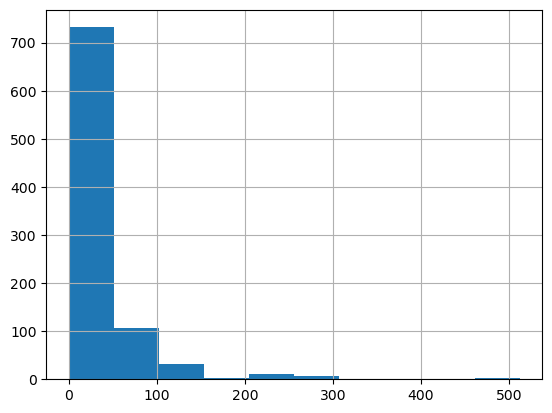

In [8]:
trainData['Fare'].hist()

<Axes: >

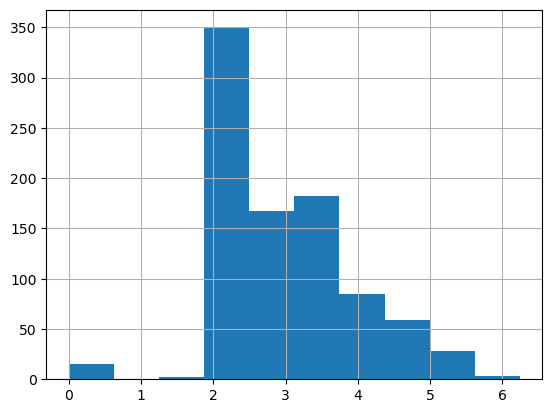

In [9]:
# Taking log of Fare
trainData['LogFare'] = np.log(trainData['Fare'] + 1)
trainData['LogFare'].hist()

# It is recommended to take log of larger value columns

In [10]:
trainData.describe(include=[object])

Name   Sex  Ticket    Cabin Embarked
count                       891   891     891      891      891
unique                      891     2     681      147        3
top     Braund, Mr. Owen Harris  male  347082  B96 B98        S
freq                          1   577       7      691      646

In [11]:
# using 'get_dummies()' method to tokenize 'sex', 'cabin', etc.

trainData = pd.get_dummies(trainData, columns=['Sex', 'Embarked', 'Pclass'])
trainData.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [12]:
# Added columns
addedCols = ['Sex_male', 'Sex_female', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Embarked_C', 'Embarked_Q', 'Embarked_S']
trainData[addedCols].head()

Sex_male  Sex_female  Pclass_1  Pclass_2  Pclass_3  Embarked_C  Embarked_Q  \
0         1           0         0         0         1           0           0   
1         0           1         1         0         0           1           0   
2         0           1         0         0         1           0           0   
3         0           1         1         0         0           0           0   
4         1           0         0         0         1           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [13]:
features = ['Age', 'SibSp', 'Parch', 'LogFare'] + addedCols  # Features to be used in model
X = torch.tensor(trainData[features].values, dtype=torch.float)
y = torch.tensor(trainData.Survived, dtype=torch.float)

# Shape Check
X.shape, y.shape

(torch.Size([891, 12]), torch.Size([891]))

In [14]:
# Train Test Split
XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
len(XTrain), len(yTrain), len(XTest), len(yTest)

(712, 712, 179, 179)

In [15]:
# First 5 rows of X and y

print(f"First five rows of X:\n{X[:5]}")
print(f"\nFirst five rows of y:\n{y[:5]}")

First five rows of X:
tensor([[22.0000,  1.0000,  0.0000,  2.1102,  1.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  0.0000,  1.0000,  1.0000,  0.0000,
          0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  0.0000,  1.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  0.0000,  1.0000,  1.0000,  0.0000,
          0.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  1.0000,  0.0000,  0.0000,  0.0000,
          1.0000,  0.0000,  0.0000,  1.0000]])

First five rows of y:
tensor([0., 1., 1., 1., 0.])


In [43]:
# Creating a Neural Network

class Titanic(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer1 = nn.Linear(in_features=12, out_features=1024)
        self.layer2 = nn.Linear(in_features=1024, out_features=1024)
        self.layer3 = nn.Linear(in_features=1024, out_features=1024)
        self.layer4 = nn.Linear(in_features=1024, out_features=1)
        self.relu = nn.ReLU()
        
    def forward(self, x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.layer4(x)
        
        return x

In [44]:
torch.manual_seed(42)
model0 = Titanic().to(device)
model0

Titanic(
  (layer1): Linear(in_features=12, out_features=1024, bias=True)
  (layer2): Linear(in_features=1024, out_features=1024, bias=True)
  (layer3): Linear(in_features=1024, out_features=1024, bias=True)
  (layer4): Linear(in_features=1024, out_features=1, bias=True)
  (relu): ReLU()
)

In [45]:
# Predictions with untrained model
untrainedPred = model0(XTest.to(device))

print(f"Length of predicitons: {len(untrainedPred)}, shape: {untrainedPred.shape}")
print(f"Length of test samples: {len(yTest)}, shape: {yTest.shape}")

print(f"\nFirst 10 predictions: {untrainedPred[:10].squeeze()}")
print(f"\nFirst 10 test labels: {yTest[:10]}")

Length of predicitons: 179, shape: torch.Size([179, 1])
Length of test samples: 179, shape: torch.Size([179])

First 10 predictions: tensor([-0.1075, -0.2004, -0.1079,  0.0045, -0.0402, -0.1685, -0.1443, -0.0682,
        -0.0833, -0.0794], grad_fn=<SqueezeBackward0>)

First 10 test labels: tensor([1., 0., 0., 1., 1., 1., 1., 0., 1., 1.])


In [52]:
# Setup loss function and optimizer

lossFn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.1)

In [53]:
# Accuracy Function

def accuracyFn(yTrue, yPred):
    correct = torch.eq(yTrue, yPred).sum().item()
    acc = (correct / len(yPred)) * 100
    return acc

In [54]:
# Training Loop

epochs = 100

XTrain, yTrain = XTrain.to(device), yTrain.to(device)
XTest, yTest = XTest.to(device), yTest.to(device)

for epoch in range(epochs):
    model0.train()
    yLogits = model0(XTrain).squeeze()
    yPred = torch.round(torch.sigmoid(yLogits))
    
    loss = lossFn(yLogits, yTrain)
    acc = accuracyFn(yTrue=yTrain, yPred=yPred)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    model0.eval()
    with torch.inference_mode():
        testLogits = model0(XTest).squeeze()
        testPred = torch.round(torch.sigmoid(testLogits))
        testLoss = lossFn(testLogits, yTest)
        testAcc = accuracyFn(yTrue=yTest, yPred=testPred)
    
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {testLoss:.5f}, Test Accuracy: {testAcc:.2f}%")

Epoch: 0 | Loss: 0.59676, Accuracy: 69.80% | Test Loss: 0.58810, Test Accuracy: 79.89%
Epoch: 10 | Loss: 0.66786, Accuracy: 64.75% | Test Loss: 0.67192, Test Accuracy: 59.78%
Epoch: 20 | Loss: 0.63361, Accuracy: 65.59% | Test Loss: 0.63896, Test Accuracy: 60.89%
Epoch: 30 | Loss: 0.66606, Accuracy: 65.03% | Test Loss: 0.67072, Test Accuracy: 59.22%
Epoch: 40 | Loss: 0.63763, Accuracy: 64.75% | Test Loss: 0.64933, Test Accuracy: 60.34%
Epoch: 50 | Loss: 0.64463, Accuracy: 64.89% | Test Loss: 0.65793, Test Accuracy: 59.22%
Epoch: 60 | Loss: 0.65143, Accuracy: 67.28% | Test Loss: 0.65434, Test Accuracy: 59.78%
Epoch: 70 | Loss: 0.62572, Accuracy: 65.31% | Test Loss: 0.63557, Test Accuracy: 59.78%
Epoch: 80 | Loss: 0.61896, Accuracy: 65.73% | Test Loss: 0.62255, Test Accuracy: 61.45%
Epoch: 90 | Loss: 0.62984, Accuracy: 65.31% | Test Loss: 0.66055, Test Accuracy: 59.78%


In [22]:
# Submission

# Prerpocessing
testData.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [23]:
testData['Fare'] = testData.Fare.fillna(0)
testData.fillna(modes, inplace=True)
testData['LogFare'] = np.log(testData['Fare'] + 1)
testData = pd.get_dummies(testData, columns=['Sex', 'Pclass', 'Embarked'])

testData.head()

PassengerId                                          Name   Age  SibSp  \
0          892                              Kelly, Mr. James  34.5      0   
1          893              Wilkes, Mrs. James (Ellen Needs)  47.0      1   
2          894                     Myles, Mr. Thomas Francis  62.0      0   
3          895                              Wirz, Mr. Albert  27.0      0   
4          896  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  22.0      1   

   Parch   Ticket     Fare    Cabin   LogFare  Sex_female  Sex_male  Pclass_1  \
0      0   330911   7.8292  B96 B98  2.178064           0         1         0   
1      0   363272   7.0000  B96 B98  2.079442           1         0         0   
2      0   240276   9.6875  B96 B98  2.369075           0         1         0   
3      0   315154   8.6625  B96 B98  2.268252           0         1         0   
4      1  3101298  12.2875  B96 B98  2.586824           1         0         0   

   Pclass_2  Pclass_3  Embarked_C  Embarked_Q  Embarked_S  
0         0         1           0           1           0  
1         0         1           0           0           1  
2         1         0           0           1           0  
3         0         1           0           0           1  
4         0         1           0           0           1

In [55]:
ySub = torch.tensor(testData[features].values, dtype=torch.float)
ySub = ySub.to(device)

# Making Predictions
model0.eval()
with torch.inference_mode():
    testData['Survived'] = torch.round(torch.sigmoid(model0(ySub))).squeeze()

In [56]:
submissionDF = testData[['PassengerId', 'Survived']]
submissionDF.head()

PassengerId  Survived
0          892       0.0
1          893       0.0
2          894       1.0
3          895       0.0
4          896       0.0

In [57]:
# Saving predictions to a file

submissionDF.to_csv('submission.csv', index=False)